# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [191]:
df = pd.read_csv("../data/am_pm.csv")
df

,Unnamed: 0,date,am,pm,target,prediction
0,0,2020-04-17,21,2,working_day,weekend
1,1,2020-04-18,1,68,weekend,working_day
2,2,2020-04-19,18,15,weekend,working_day
3,3,2020-04-20,2,23,working_day,working_day
4,4,2020-04-21,0,25,working_day,working_day
5,5,2020-04-22,0,28,working_day,working_day
6,6,2020-04-23,10,33,working_day,working_day
7,7,2020-04-24,2,14,working_day,working_day
8,8,2020-04-25,30,74,weekend,working_day
9,9,2020-04-26,28,233,weekend,working_day


In [192]:
X = df[['am','pm']]
Y = df['target']

In [193]:
model = LogisticRegression(random_state=21,fit_intercept=False)
model.fit(X,Y)
model.coef_

array([[-0.00038653,  0.00298066]])

y = k*x + b
Общий вид -> w_1*x_1 + w_2*x_2 - w_0 = 0 пусть w_0 = 0 => am * x_1 + pm * x_2 = 0 => pm = (-am * x_1) / x_2

In [194]:
def func1_df(x1,x2,df):
    new_df = pd.DataFrame()
    new_df['am'] = df['am']
    new_df['pm'] = df['am'].apply(lambda x: (x * -x1) / x2)
    
    return new_df

x1 = model.coef_[0][0]
x2 = model.coef_[0][1]
new_df = func1_df(x1,x2,df=df)
new_df


,am,pm
0,21,2.723245
1,1,0.129678
2,18,2.334210
3,2,0.259357
4,0,0.000000
5,0,0.000000
6,10,1.296783
7,2,0.259357
8,30,3.890349
9,28,3.630993


In [195]:
df

,Unnamed: 0,date,am,pm,target,prediction
0,0,2020-04-17,21,2,working_day,weekend
1,1,2020-04-18,1,68,weekend,working_day
2,2,2020-04-19,18,15,weekend,working_day
3,3,2020-04-20,2,23,working_day,working_day
4,4,2020-04-21,0,25,working_day,working_day
5,5,2020-04-22,0,28,working_day,working_day
6,6,2020-04-23,10,33,working_day,working_day
7,7,2020-04-24,2,14,working_day,working_day
8,8,2020-04-25,30,74,weekend,working_day
9,9,2020-04-26,28,233,weekend,working_day


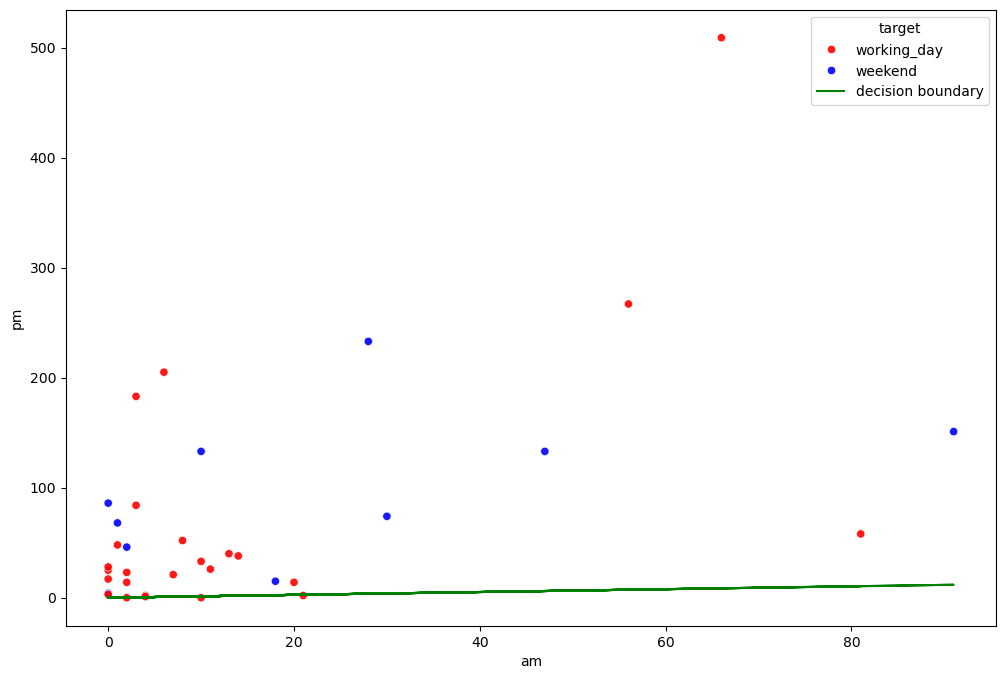

In [196]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(df,x=df['am'],y=df['pm'],hue='target',alpha=0.9,marker='o',legend="full",palette={'working_day': 'red', 'weekend': 'blue'})
new_df.plot(x='am',y='pm',ax=ax,c='green',kind='line',label='decision boundary')
plt.show()

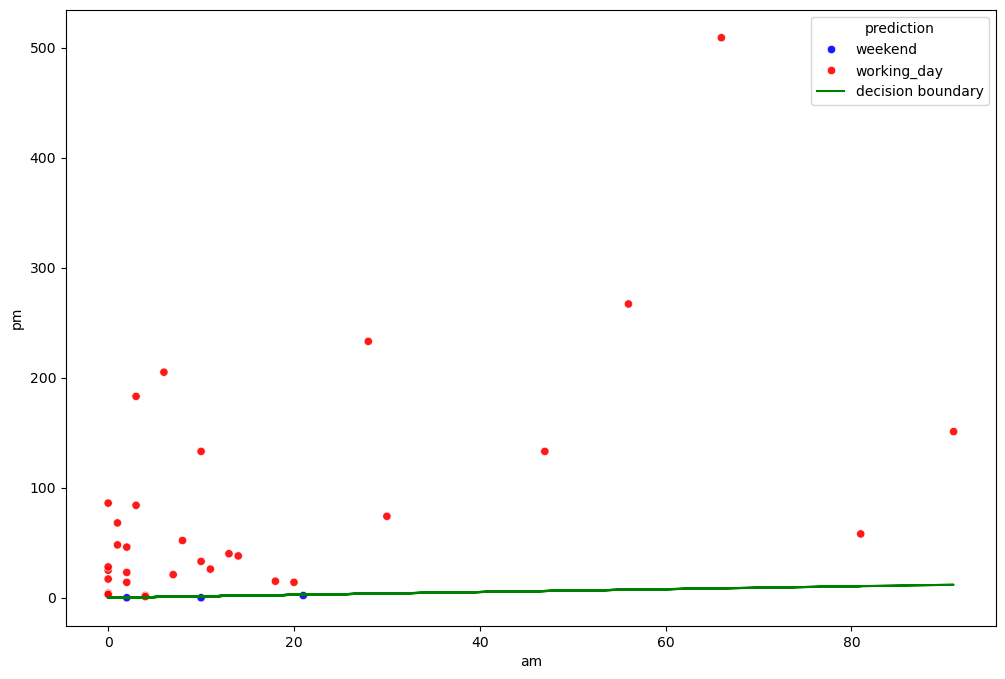

In [197]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(df,x=df['am'],y=df['pm'],hue='prediction',alpha=0.9,marker='o',legend="full",palette={'working_day': 'red', 'weekend': 'blue'})
new_df.plot(x='am',y='pm',ax=ax,c='green',kind='line',label='decision boundary')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

Scaling data

In [198]:
scaler = StandardScaler()
X_with_scaler=scaler.fit_transform(X)
X_with_scaler

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [199]:
df[['am_sc','pm_sc']] = scaler.fit_transform(df[['am','pm']])
df

,Unnamed: 0,date,am,pm,target,prediction,am_sc,pm_sc
0,0,2020-04-17,21,2,working_day,weekend,0.200690,-0.719904
1,1,2020-04-18,1,68,weekend,working_day,-0.655914,-0.071822
2,2,2020-04-19,18,15,weekend,working_day,0.072199,-0.592251
3,3,2020-04-20,2,23,working_day,working_day,-0.613084,-0.513696
4,4,2020-04-21,0,25,working_day,working_day,-0.698744,-0.494057
5,5,2020-04-22,0,28,working_day,working_day,-0.698744,-0.464599
6,6,2020-04-23,10,33,working_day,working_day,-0.270442,-0.415502
7,7,2020-04-24,2,14,working_day,working_day,-0.613084,-0.602071
8,8,2020-04-25,30,74,weekend,working_day,0.586162,-0.012906
9,9,2020-04-26,28,233,weekend,working_day,0.500501,1.548382


In [200]:
X_main = scaler.fit_transform(df[['am','pm']])
X_main

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [201]:
model2 = LogisticRegression(random_state=21,fit_intercept=False)
model2

LogisticRegression(fit_intercept=False, random_state=21)

In [202]:
X_scaled = df[['am_sc','pm_sc']]
X_scaled

,am_sc,pm_sc
0,0.200690,-0.719904
1,-0.655914,-0.071822
2,0.072199,-0.592251
3,-0.613084,-0.513696
4,-0.698744,-0.494057
5,-0.698744,-0.464599
6,-0.270442,-0.415502
7,-0.613084,-0.602071
8,0.586162,-0.012906
9,0.500501,1.548382


In [203]:
model2.fit(X_scaled,df['target'])

LogisticRegression(fit_intercept=False, random_state=21)

In [204]:
prediction = model2.predict(X_scaled)
prediction

array(['working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'weekend', 'weekend', 'working_day',
       'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend',
       'working_day', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day'], dtype=object)

In [205]:
df['pr_for_scaled_data'] = prediction
df

,Unnamed: 0,date,am,pm,target,prediction,am_sc,pm_sc,pr_for_scaled_data
0,0,2020-04-17,21,2,working_day,weekend,0.200690,-0.719904,working_day
1,1,2020-04-18,1,68,weekend,working_day,-0.655914,-0.071822,working_day
2,2,2020-04-19,18,15,weekend,working_day,0.072199,-0.592251,working_day
3,3,2020-04-20,2,23,working_day,working_day,-0.613084,-0.513696,working_day
4,4,2020-04-21,0,25,working_day,working_day,-0.698744,-0.494057,working_day
5,5,2020-04-22,0,28,working_day,working_day,-0.698744,-0.464599,working_day
6,6,2020-04-23,10,33,working_day,working_day,-0.270442,-0.415502,working_day
7,7,2020-04-24,2,14,working_day,working_day,-0.613084,-0.602071,working_day
8,8,2020-04-25,30,74,weekend,working_day,0.586162,-0.012906,weekend
9,9,2020-04-26,28,233,weekend,working_day,0.500501,1.548382,weekend


In [206]:
accur1 = accuracy_score(df['target'],df['pr_for_scaled_data'])
accur1


0.7428571428571429

In [207]:
def func2_df(x1,x2,df):
    new_df = pd.DataFrame()
    new_df['am_sc'] = df['am_sc']
    new_df['pm_sc'] = df['am_sc'].apply(lambda x: (x * -x1) / x2)
    
    return new_df

x1 = model2.coef_[0][0]
x2 = model2.coef_[0][1]
new2_df = func2_df(x1,x2,df=df)
new2_df

,am_sc,pm_sc
0,0.200690,-0.690250
1,-0.655914,2.255940
2,0.072199,-0.248322
3,-0.613084,2.108631
4,-0.698744,2.403250
5,-0.698744,2.403250
6,-0.270442,0.930154
7,-0.613084,2.108631
8,0.586162,-2.016036
9,0.500501,-1.721417


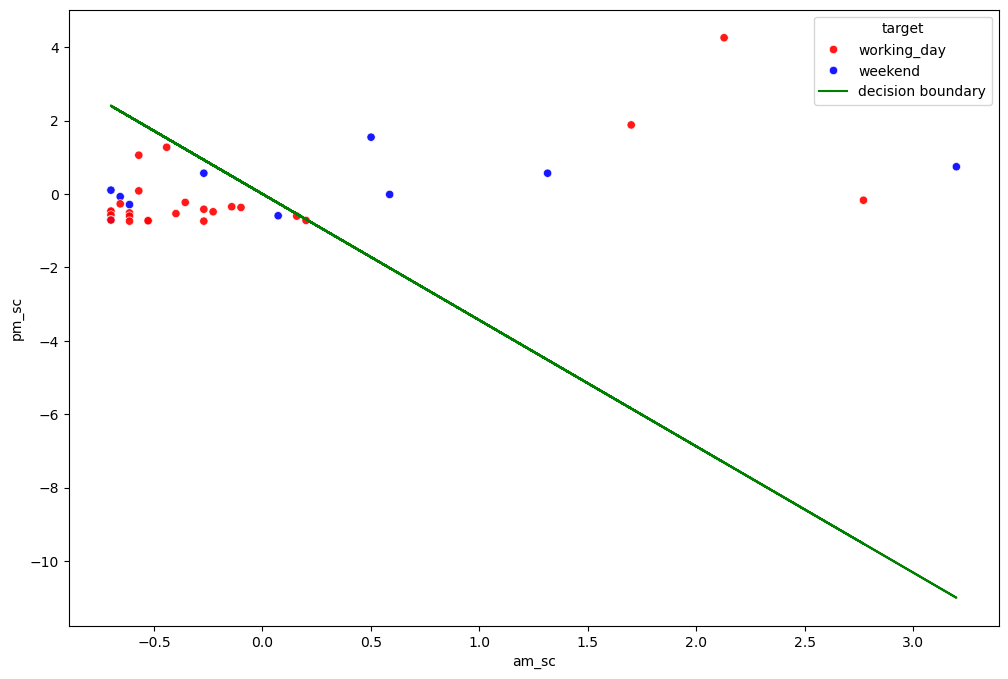

In [208]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(df,x=df['am_sc'],y=df['pm_sc'],hue='target',alpha=0.9,marker='o',legend="full",palette={'working_day': 'red', 'weekend': 'blue'})
new2_df.plot(x='am_sc',y='pm_sc',ax=ax,c='green',kind='line',label='decision boundary')
plt.show()

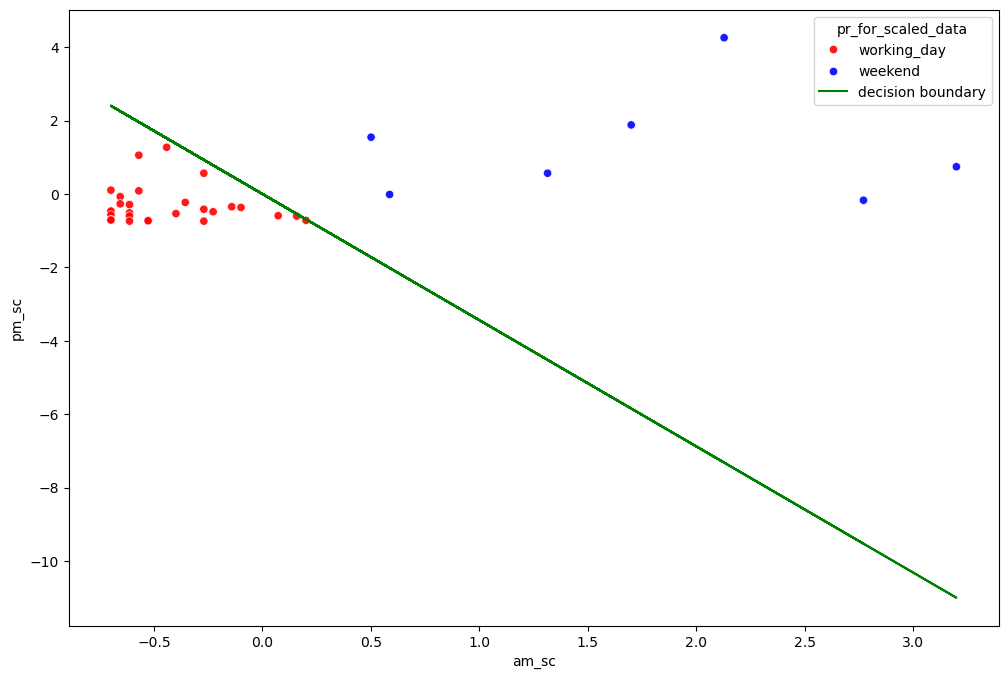

In [209]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(df,x=df['am_sc'],y=df['pm_sc'],hue='pr_for_scaled_data',alpha=0.9,marker='o',legend="full",palette={'working_day': 'red', 'weekend': 'blue'})
new2_df.plot(x='am_sc',y='pm_sc',ax=ax,c='green',kind='line',label='decision boundary')
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [210]:
new_df = pd.read_csv("../data/am_pm.csv")
new_df['y'] = [1 if item == 'working_day' else 0 for item in new_df['target']]
new_df['prediction']=new_df['prediction'].map(lambda x: 1 if x == 'working_day' else 0)
new_df

,Unnamed: 0,date,am,pm,target,prediction,y
0,0,2020-04-17,21,2,working_day,0,1
1,1,2020-04-18,1,68,weekend,1,0
2,2,2020-04-19,18,15,weekend,1,0
3,3,2020-04-20,2,23,working_day,1,1
4,4,2020-04-21,0,25,working_day,1,1
5,5,2020-04-22,0,28,working_day,1,1
6,6,2020-04-23,10,33,working_day,1,1
7,7,2020-04-24,2,14,working_day,1,1
8,8,2020-04-25,30,74,weekend,1,0
9,9,2020-04-26,28,233,weekend,1,0


In [211]:
X=np.asarray(new_df[['am','pm']])
y=np.asarray(new_df['y'])
scaler1 = StandardScaler()
X_with_sc=scaler1.fit_transform(X)
X_with_sc

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [212]:
model_svc=SVC(kernel='linear',probability=True, random_state=21)
model_svc.fit(X_with_sc,y)
pred_y=model_svc.predict(X_with_sc)
accuracy_score(pred_y,y)

0.7142857142857143

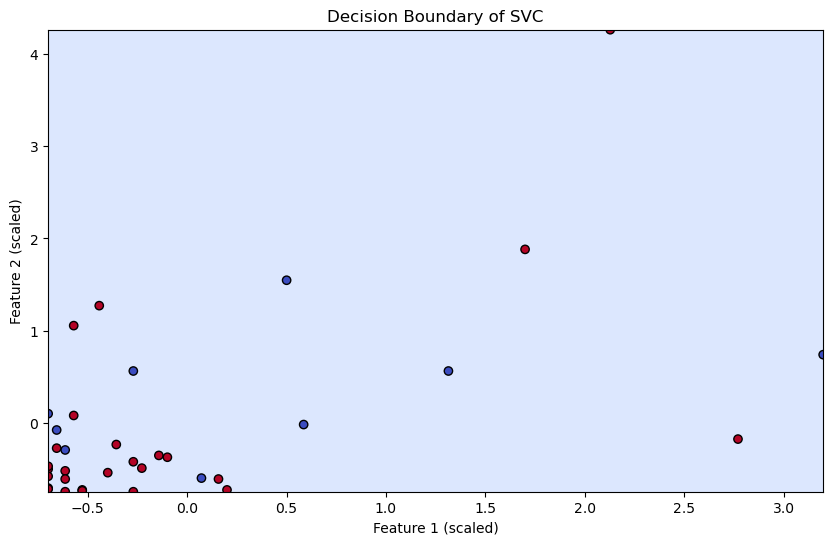

In [213]:
xx, yy = np.meshgrid(np.linspace(X_with_sc[:,0].min(), X_with_sc[:,0].max(), 100), 
                     np.linspace(X_with_sc[:,1].min(), X_with_sc[:,1].max(), 100))
Z = model_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_with_sc[:, 0], X_with_sc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm) 
plt.title('Decision Boundary of SVC')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [214]:
model_svc_poly=SVC(kernel='poly',probability=True, random_state=21)
model_svc_poly.fit(X_with_sc,y)
pred_y=model_svc_poly.predict(X_with_sc)
accuracy_score(pred_y,y)
    

0.7428571428571429

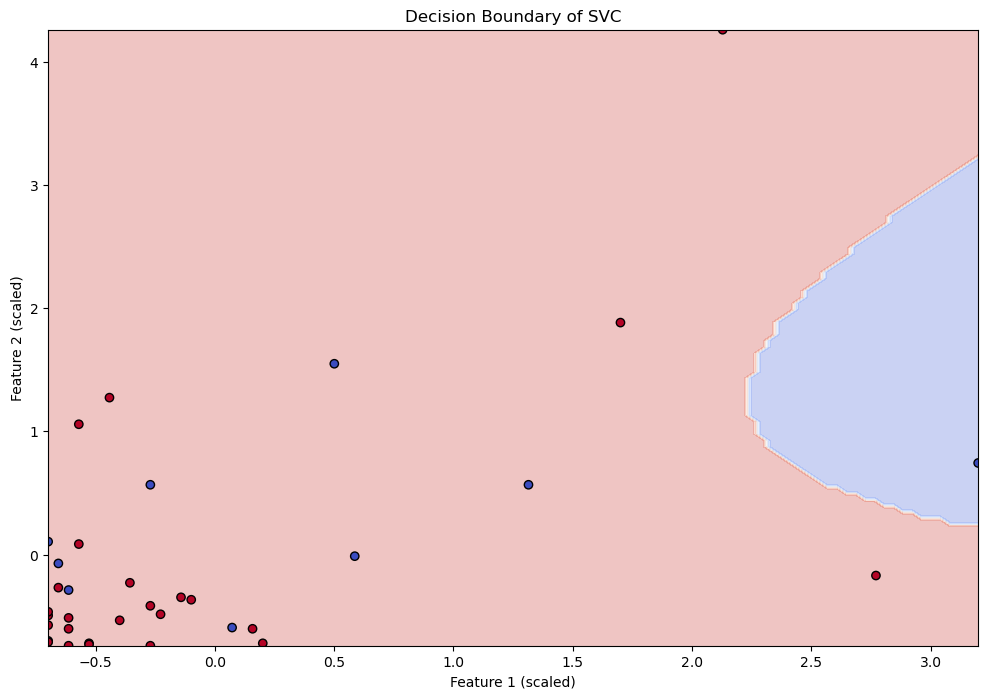

In [215]:



xx, yy = np.meshgrid(np.linspace(X_with_sc[:,0].min(), X_with_sc[:,0].max(), 100), 
                     np.linspace(X_with_sc[:,1].min(), X_with_sc[:,1].max(), 100))
Z = model_svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_with_sc[:, 0], X_with_sc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm) 
plt.title('Decision Boundary of SVC')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()




In [216]:
model_svc_rbf=SVC(kernel='rbf',probability=True, random_state=21)
model_svc_rbf.fit(X_with_sc,y)
pred_y=model_svc_rbf.predict(X_with_sc)
accuracy_score(pred_y,y)

0.7428571428571429

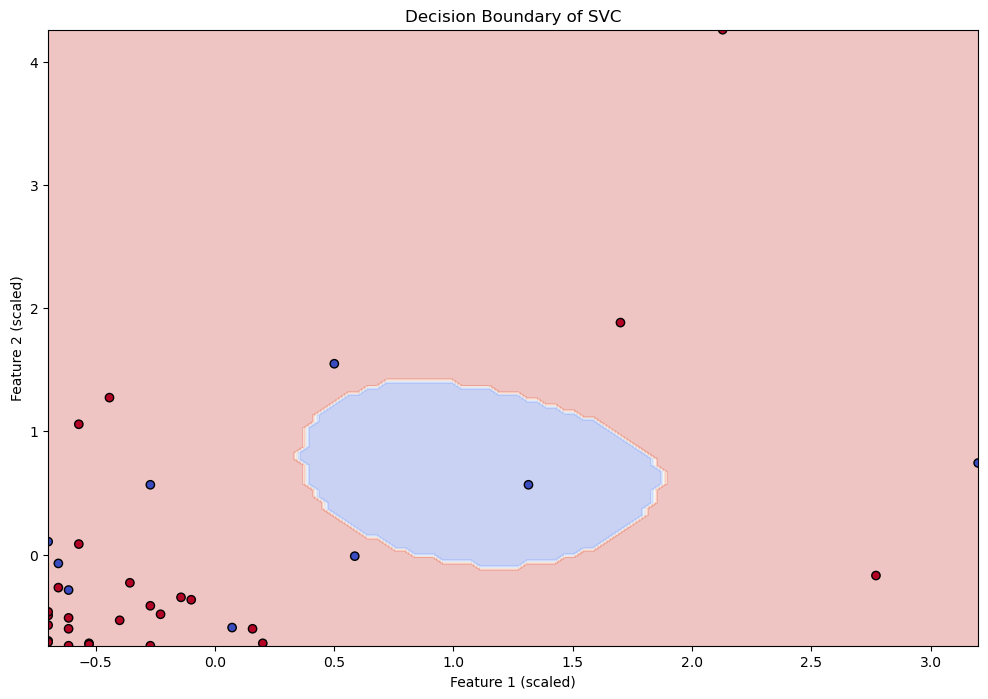

In [217]:

xx, yy = np.meshgrid(np.linspace(X_with_sc[:,0].min(), X_with_sc[:,0].max(), 100), 
                     np.linspace(X_with_sc[:,1].min(), X_with_sc[:,1].max(), 100))
Z = model_svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_with_sc[:, 0], X_with_sc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm) 
plt.title('Decision Boundary of SVC')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



In [218]:
model_svc_f=SVC(kernel='sigmoid',probability=True, random_state=21)
model_svc_f.fit(X_with_sc,y)
pred_y=model_svc_f.predict(X_with_sc)
accuracy_score(pred_y,y)

0.6857142857142857

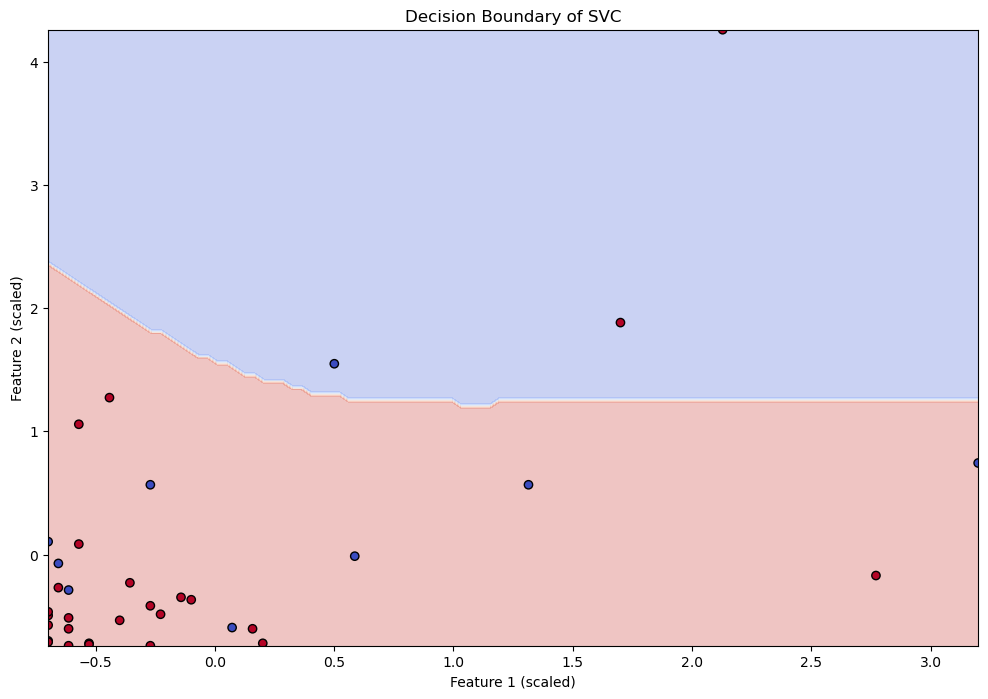

In [219]:
xx, yy = np.meshgrid(np.linspace(X_with_sc[:,0].min(), X_with_sc[:,0].max(), 100), 
                     np.linspace(X_with_sc[:,1].min(), X_with_sc[:,1].max(), 100))
Z = model_svc_f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_with_sc[:, 0], X_with_sc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm) 
plt.title('Decision Boundary of SVC')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [220]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
dict1 = {}

for ker in kernels:
    mod = SVC(probability=True, random_state=21, kernel=ker)
    mod.fit(df[['am_sc','pm_sc']],df['target'])
    y_pred = mod.predict(df[['am_sc','pm_sc']])  
    accur = accuracy_score(df['target'], y_pred)  
    dict1[ker] = accur  

for kernel, accuracy in dict1.items():
    print(f'Kernel: {kernel}, Accuracy: {accuracy}')

Kernel: linear, Accuracy: 0.7142857142857143
Kernel: poly, Accuracy: 0.7428571428571429
Kernel: rbf, Accuracy: 0.7428571428571429
Kernel: sigmoid, Accuracy: 0.6857142857142857


## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [221]:
model_tree = DecisionTreeClassifier(max_depth=4,random_state=42)
model_tree

DecisionTreeClassifier(max_depth=4, random_state=42)

In [222]:
model_tree.fit(X_with_sc,y)
y

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [223]:
pr_y = model_tree.predict(X_with_sc)
accur2 = accuracy_score(y,pr_y)
accur2

0.9428571428571428

In [224]:
s = {}
for i in [1,3,4,5,6,7]:
    m_d = DecisionTreeClassifier(max_depth=i,random_state=42)
    m_d.fit(X_with_sc,y)
    p_y = m_d.predict(X_with_sc)
    ac = accuracy_score(y,p_y)
    s[f'Max Depth {i}'] = ac
s


{'Max Depth 1': 0.7714285714285715,
 'Max Depth 3': 0.8857142857142857,
 'Max Depth 4': 0.9428571428571428,
 'Max Depth 5': 0.9714285714285714,
 'Max Depth 6': 1.0,
 'Max Depth 7': 1.0}

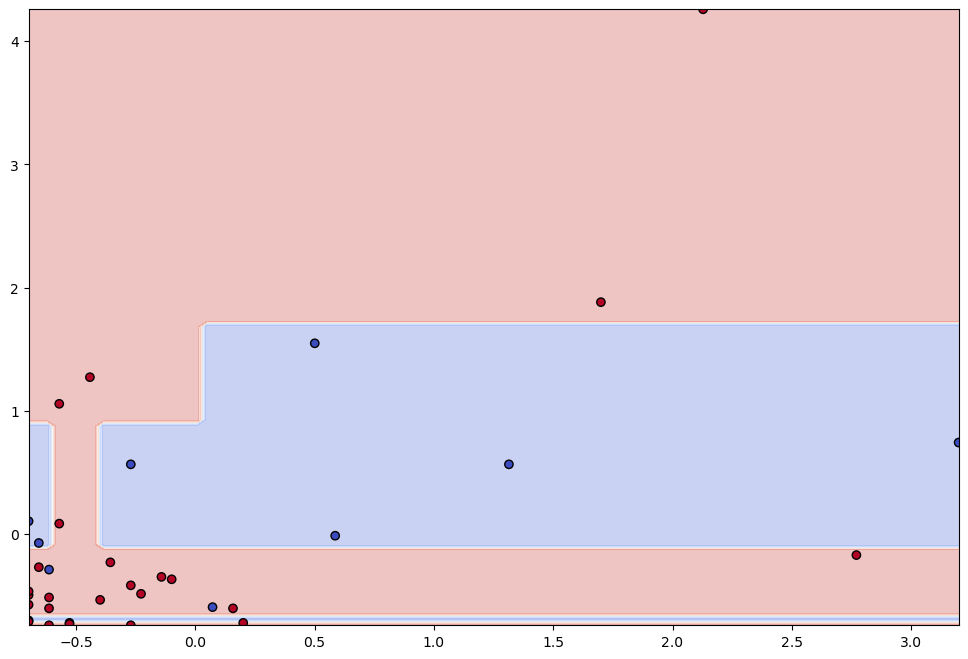

In [225]:
xx, yy = np.meshgrid(np.linspace(X_with_sc[:,0].min(), X_with_sc[:,0].max(), 100), 
                     np.linspace(X_with_sc[:,1].min(), X_with_sc[:,1].max(), 100))
Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_with_sc[:, 0], X_with_sc[:, 1], c=y, edgecolors='black', cmap=plt.cm.coolwarm)
plt.show()

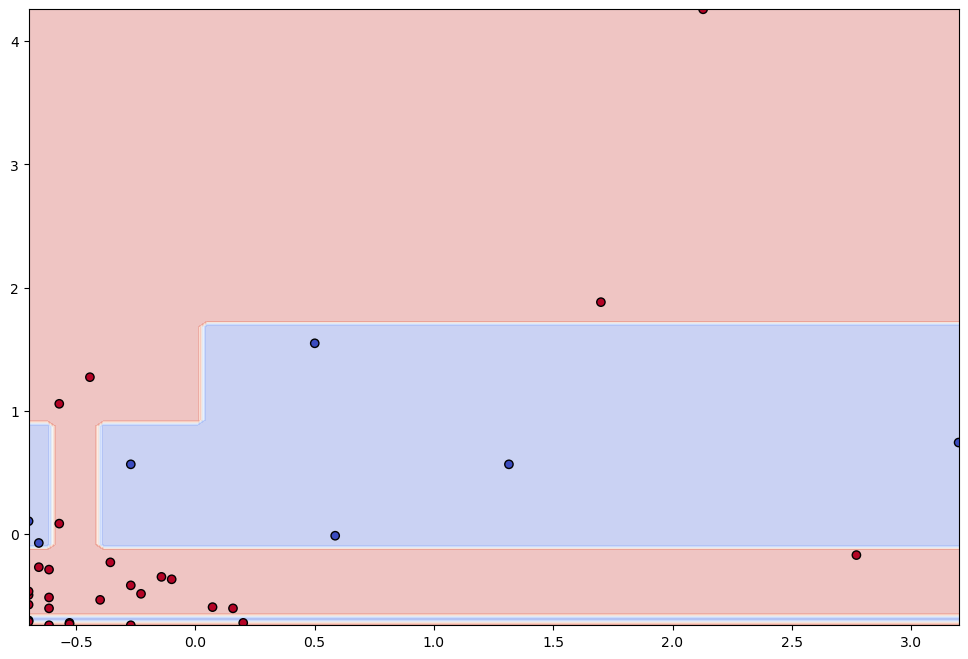

In [226]:
xx, yy = np.meshgrid(np.linspace(X_with_sc[:,0].min(), X_with_sc[:,0].max(), 100), 
                     np.linspace(X_with_sc[:,1].min(), X_with_sc[:,1].max(), 100))
Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_with_sc[:, 0], X_with_sc[:, 1], c=pr_y, edgecolors='black', cmap=plt.cm.coolwarm)
plt.show()

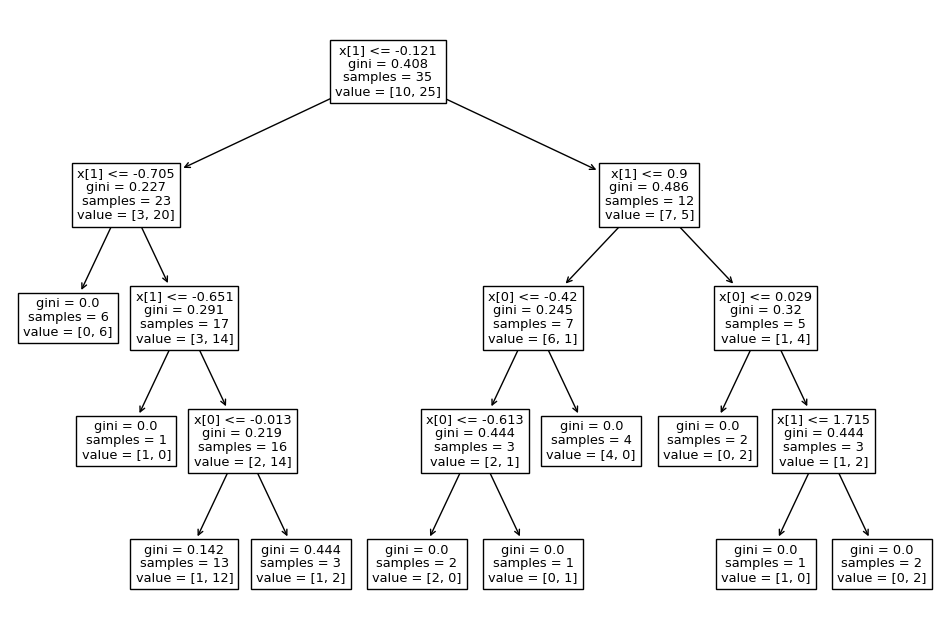

In [227]:
plt.figure(figsize=(12,8))
tree.plot_tree(model_tree)
plt.show()


6